# Implementation of HED in Pytorch
---


In [1]:
# import torch libraries
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import os
import numpy as np
import pandas as pd
from PIL import Image
import skimage.io as io
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import utility functions
from model import HED
from trainer import Trainer
from dataproc import TrainDataset

In [2]:
# fix random seed
rng = np.random.RandomState(37148)

# GPU ID
gpuID = 0

In [4]:
import os
print(os.getcwd())

/home/arnab/tinkering-projects/pytorch-hed


### Inspect Training Data

In [5]:
# load the images dataset


dataRoot = './data/HED-BSDS/'
trainPath = dataRoot+'train_pair.lst'

rootDir = dataRoot
frame = pd.read_csv(trainPath, dtype=str, delimiter=' ')

# check some sample images
idx = 1

# input and target images
inputName = os.path.join(rootDir, frame.iloc[idx, 0])
targetName = os.path.join(rootDir, frame.iloc[idx, 1])        

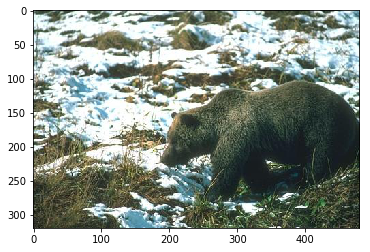

In [6]:
# process the images
inputImage = np.asarray(Image.open(inputName).convert('RGB'))

crop = 32
inputImage = inputImage[crop:-crop,crop:-crop,:]

plt.figure()
plt.imshow(inputImage)
plt.show()

inputImage = inputImage.astype(np.float32)
inputImage = inputImage/255.0
#inputImage = inputImage[:,:,::-1]
inputImage -= np.array((0.485, 0.456, 0.406))
inputImage /= np.array((0.229, 0.224, 0.225))        

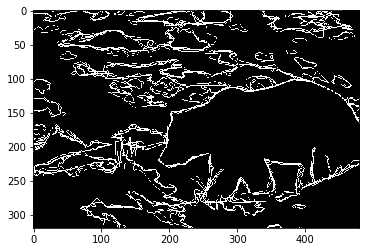

In [7]:
# process input and target images
targetImage = io.imread(targetName)

crop = 32
targetImage = targetImage[crop:-crop,crop:-crop,:]

if len(targetImage.shape) == 3:
    targetImage = targetImage[:,:,0]
targetImage = targetImage/255.0
targetImage = targetImage > 0.0
targetImage = targetImage.astype(np.float32)

plt.figure()
plt.imshow(targetImage,cmap=cm.gray)
plt.show()

### Train the Network

In [ ]:
# batch size
nBatch = 1

# load the images dataset
dataRoot = '../HED-BSDS/'
valPath = dataRoot+'val_pair.lst'
trainPath = dataRoot+'train_pair.lst'

# create data loaders from dataset
valDataset = TrainDataset(valPath, dataRoot)
trainDataset = TrainDataset(trainPath, dataRoot)

valDataloader = DataLoader(valDataset, batch_size=nBatch, shuffle=False)
trainDataloader = DataLoader(trainDataset, batch_size=nBatch, shuffle=False)

In [ ]:
# initialize the network
net = HED(pretrained=False)
net.cuda(gpuID)

# define the optimizer
optimizer = optim.SGD(net.parameters(), lr=1e-6, momentum=0.9, weight_decay=0.0002)

In [ ]:
# initialize trainer class
trainer = Trainer(net, optimizer, trainDataloader, valDataloader, maxEpochs=1, cuda=True, gpuID=gpuID)

# train the network
trainer.train()